In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

In [2]:
(feature_train, label_train), (feature_test, label_test) = mnist.load_data()


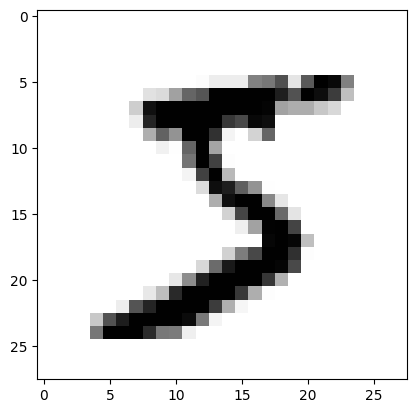

In [3]:
plotter.imshow(feature_train[0], cmap = "binary")

In [4]:
ft_zeros_only = feature_train[label_train == 0]
# ftest_zeros_only = feature_test[label_test == 0]
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = (28, 28)))
discriminator.add(Dense(units = 400, activation = "relu"))
discriminator.add(Dense(units = 200, activation = "relu"))
discriminator.add(Dense(units = 100, activation = "relu"))
discriminator.add(Dense(1, activation = "sigmoid"))
discriminator.compile(loss = "binary_crossentropy", optimizer = "adam")

In [6]:
generator = Sequential()
generator.add(Dense(units = 100, activation = "relu", input_shape = [100]))
generator.add(Dense(units = 150, activation = "relu"))
generator.add(Dense(units = 200, activation = "relu"))
generator.add(Dense(units = 300, activation = "relu"))
generator.add(Dense(units = 450, activation = "relu"))
generator.add(Dense(units = 784, activation = "sigmoid"))
generator.add(Reshape((28, 28)))

In [7]:
gan = Sequential([generator, discriminator])
generator.trainable = False
gan.compile(loss = "binary_crossentropy", optimizer = "adam")

In [8]:
batch_size = 32
data = ft_zeros_only
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size = 1000)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [9]:
gan.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 150)               15150     
                                                                 
 dense_6 (Dense)             (None, 200)               30200     
                                                                 
 dense_7 (Dense)             (None, 300)               60300     
                                                                 
 dense_8 (Dense)             (None, 450)               135450    
                                                                 
 dense_9 (Dense)             (None, 784)               353584    
                                                                 
 reshape (Reshape)           (None, 28, 28)           

In [10]:
count = 0
for stuff in dataset:
    print(stuff.shape)


(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)
(32, 28, 28)

In [11]:
counter = 1
gener, discrim = gan.layers
for i in range(counter):
    print("Training Epoch: ")
    ind = 0
    for t_batch in dataset:
       ind += 1
       if ind % 10 == 0:
           print(f"currently in batch {ind} of {(len(data)//batch_size)}")
       noise = tf.random.normal(shape = [batch_size, 100])
       gen_images = gener(noise)
       fake_imgs_vs_real_imgs = tf.concat([gen_images, tf.dtypes.cast(t_batch, tf.float32)], axis = 0)
       label_one = tf.constant(np.concatenate([[[0.0]]* t_batch.shape[0], [[1.0]]* batch_size], axis = 0))
       discrim.trainable = True
       discrim.train_on_batch(x = fake_imgs_vs_real_imgs, y = label_one)
       
       noise_two = tf.random.normal(shape = [batch_size, 100])
       label_two = tf.constant([[1.0]] * batch_size)
       discrim.trainable = False
       gan.train_on_batch(noise_two, label_two)

Training Epoch: 
currently in batch 10 of 185
currently in batch 20 of 185
currently in batch 30 of 185
currently in batch 40 of 185
currently in batch 50 of 185
currently in batch 60 of 185
currently in batch 70 of 185
currently in batch 80 of 185
currently in batch 90 of 185
currently in batch 100 of 185
currently in batch 110 of 185
currently in batch 120 of 185
currently in batch 130 of 185
currently in batch 140 of 185
currently in batch 150 of 185
currently in batch 160 of 185
currently in batch 170 of 185
currently in batch 180 of 185


In [12]:
more_noise = tf.random.normal(shape = (10, 100))

In [13]:
images = generator(more_noise)

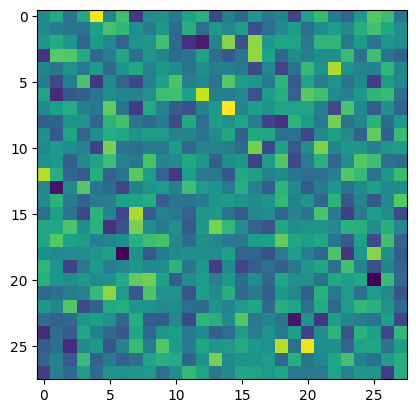

In [14]:
plotter.imshow(images[0])